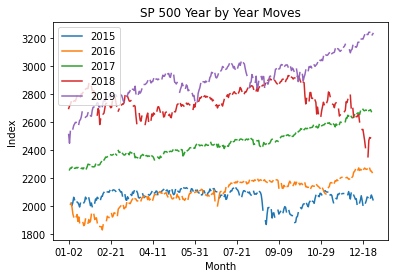

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

years = ['2015', '2016', '2017', '2018', '2019']
all_data = []

for year in years:
    # Read json data
    with open('../data/SP500 ' + year + '.json') as f:
        json_data = json.load(f)

    # Create data frame from data
    df = pd.DataFrame(json_data['historical'])

    # Sort by date
    df = df.sort_values('date', ascending=True, ignore_index=True)

    # Get necessary data
    df = df.loc[:, ['date', 'close']]

    # Only get month and day for date column since we are combining data from different years
    df['date'] = pd.to_datetime(df['date']).apply(lambda x: pd.datetime.strftime(x, '%m-%d'))
    
    # Rename columns
    df = df.rename(columns={ 'close': year })

    # Add all data to an array
    all_data.append(df)

# Set the date as index
dfs = [df.set_index('date') for df in all_data]

# Combine all data into single data frame
df_concat = pd.concat(dfs, axis=1)

# Sort the combined index
df_concat = df_concat.sort_index()

# Create plot for each column
for col in df_concat.columns:
    df_concat[col].plot()

# Configure the chart
plt.title('SP 500 Year by Year Moves')
plt.legend(df_concat.columns)
plt.ylabel('Index')
plt.xlabel('Month')
plt.show()
